# Desafío 1: Preparación del ambiente de trabajo
    ● Importe los módulos básicos para el análisis de datos
    ● Importe seaborn.
    ● Importe statsmodels.
    ● Importe LogisticRegression, train_test_split, StandardScaler, classification_report y roc_curve de sklearn.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Desafío 2: Análisis exploratorio
    ● Explore las principales relaciones entre las variables. Utilizando los métodos boxplot y lmplot de seaborn implemente los siguientes gráficos.
        ○ Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
        ○ Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.
        ○ Un boxplot del balance total de las cuentas, segmentado por el status de default.
        ○ Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
        ○ Un diagrama de dispersión entre balance e income, segmentado por el status de estudiante.
        ○ Un diagrama de dispersión entre balance e income, segmentado por el status de default.
    ● Comente brevemente sobre los principales patrones de comportamiento.

In [3]:
df=pd.read_csv('default_credit.csv')

In [4]:
df.head()

,index,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


<AxesSubplot:xlabel='student', ylabel='balance'>

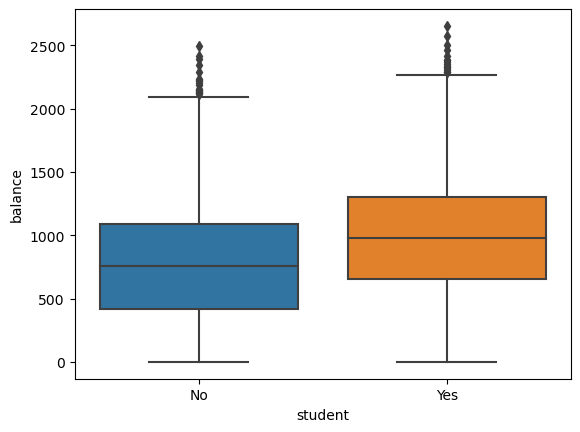

In [5]:
sns.boxplot(data=df, x="student", y="balance")

<AxesSubplot:xlabel='student', ylabel='income'>

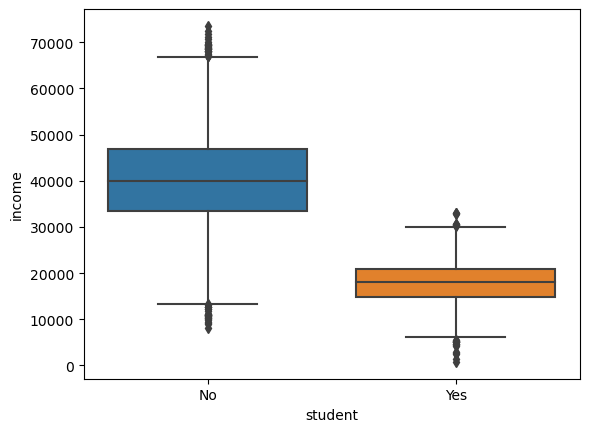

In [6]:
sns.boxplot(data=df, x="student", y="income")

<AxesSubplot:xlabel='default', ylabel='balance'>

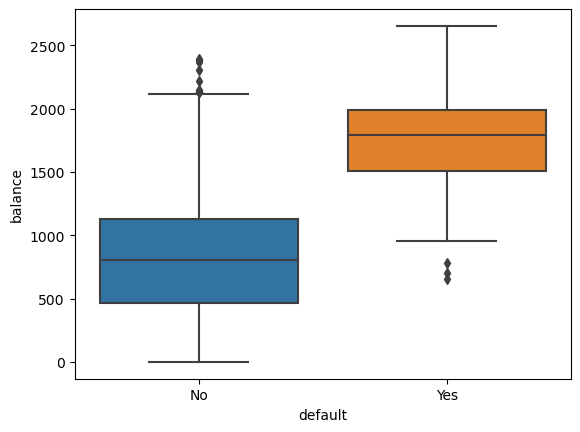

In [7]:
sns.boxplot(data=df, x="default", y="balance")

<AxesSubplot:xlabel='default', ylabel='income'>

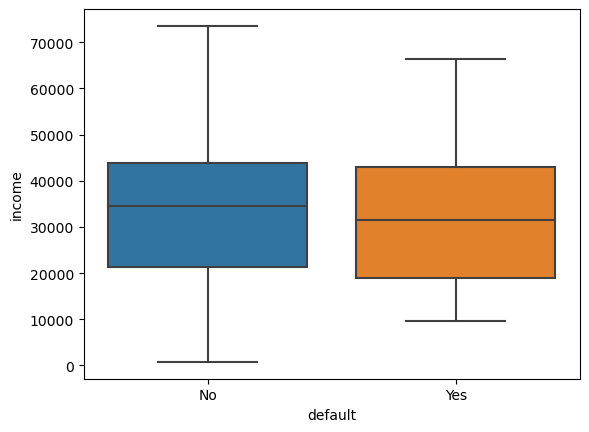

In [8]:
sns.boxplot(data=df, x="default", y="income")

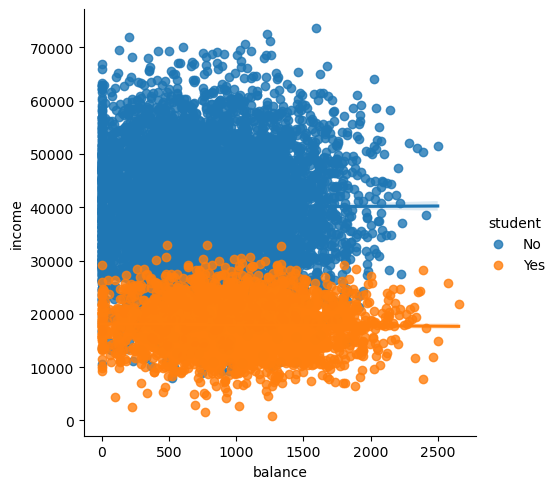

In [9]:
sns.lmplot(x="balance", y="income", hue="student",data=df)

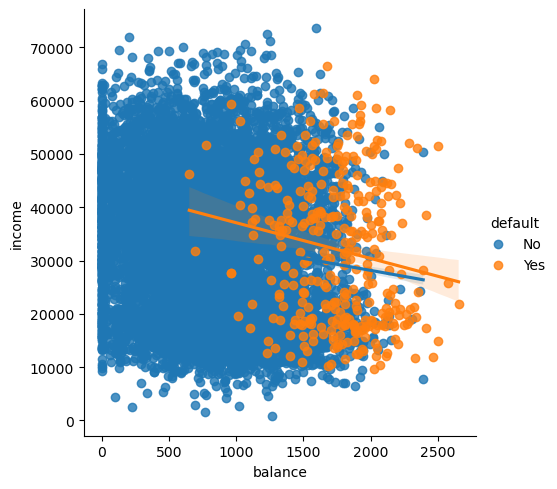

In [10]:
sns.lmplot(x="balance", y="income", hue="default",data=df)

# Desafío 3: Modelación econométrica
    ● Recodifique las variables student y default para que adquieran atributos numéricos.
    ● Implemente el siguiente modelo econométrico:
        𝑙𝑜𝑔( 𝑃𝑟(𝑑𝑒𝑓𝑎𝑢𝑙𝑡=1) ) = β + β · 𝑏𝑎𝑙𝑎𝑛𝑐𝑒 + β · 𝑖𝑛𝑐𝑜𝑚𝑒 + β · 𝑠𝑡𝑢𝑑𝑒𝑛𝑡
    ● A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.

In [11]:
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [12]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [13]:
df['student_bin'] = df['student'].replace(['No', 'Yes'], [0, 1])
df['default_bin'] = df['default'].replace(['No', 'Yes'], [0, 1])

In [14]:
df['student_bin'].value_counts()

0    7056
1    2944
Name: student_bin, dtype: int64

In [15]:
df['default_bin'].value_counts()

0    9667
1     333
Name: default_bin, dtype: int64

In [16]:
model_1 = smf.logit('default_bin ~ balance + income + student_bin', df).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [17]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_bin   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Wed, 21 Sep 2022   Pseudo R-squ.:                  0.4619
Time:                        19:40:18   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance         0.0057      0.000     24.737      0.000       0.005       0.006
income       3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student_bin    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [18]:
model_1_noincome = smf.logit('default_bin ~ balance + student_bin', df).fit()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


In [19]:
model_1_noincome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_bin   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 21 Sep 2022   Pseudo R-squ.:                  0.4619
Time:                        19:40:18   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.7495      0.369    -29.115      0.000     -11.473     -10.026
balance         0.0057      0.000     24.748      0.000       0.005       0.006
student_bin    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Desafío 4: Entrenar
    A partir del modelo depurado, genere un modelo predictivo con las siguientes características:
        ● Genera subconjuntos de entrenamiento y pruebas, separando el 33% de la muestra en el conjunto de pruebas.
        ● Estandarice las matrices de atributos de entrenamiento y pruebas usando StandardScaler() ajustado solo sobre el conjunto de entrenamiento.
        ● Implemente el modelo sin alterar los hiper parámetros.
        ● Genere la predicción de las clases y de la probabilidad.
        ● Reporte las métricas de precisión, recall y f1 para ambas clases.
        ● Grafique la curva Receiver Operator Characteristic.
    ● En base a los pasos, comente sobre el desempeño predictivo del modelo haciendo mención a todas las métricas calculadas y a la curva ROC.

In [20]:
df.sample(5)

,index,default,student,balance,income,student_bin,default_bin
4699,4700,No,No,366.701552,60456.117768,0,0
146,147,No,No,1015.614837,43218.794375,0,0
3865,3866,No,No,0.000000,45104.094028,0,0
9312,9313,No,No,75.398691,50551.036458,0,0
7318,7319,No,No,1014.725193,40223.992734,0,0


In [21]:
df=df.drop(columns='index')

In [22]:
df=df.drop(columns='default')

In [23]:
df=df.drop(columns='student')

In [24]:
df

,balance,income,student_bin,default_bin
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,1,0
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0
...,...,...,...,...
9995,711.555020,52992.378914,0,0
9996,757.962918,19660.721768,0,0
9997,845.411989,58636.156984,0,0
9998,1569.009053,36669.112365,0,0


In [25]:
df_variable_y = df['default_bin']
df_variable_x = df.drop(columns='default_bin')

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df_variable_x, df_variable_y, test_size=0.33, random_state=1234)

In [27]:
scaler = StandardScaler().fit(x_train)

In [28]:
x_train = StandardScaler().fit_transform(x_train)

In [29]:
x_test = StandardScaler().fit_transform(x_test)

In [30]:
default_model = LogisticRegression().fit(x_train, y_train)

In [31]:
default_model.coef_

array([[ 2.73702923,  0.11239501, -0.20984792]])

In [32]:
yhat = default_model.predict(x_test)

In [33]:
yhat_pr = default_model.predict_proba(x_test)

In [34]:
# implementar matriz de confunsión

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,yhat)
matrix

array([[3175,   14],
       [  78,   33]])

In [35]:
# Reporte de precisión

from sklearn.metrics import precision_score
m1_prec = precision_score(y_test, yhat)
m1_prec

0.7021276595744681

In [36]:
# Reporte de recall

from sklearn.metrics import recall_score
m1_recall = recall_score(y_test, yhat)
m1_recall

0.2972972972972973

In [37]:
# Reporte de f1

from sklearn.metrics import f1_score
m1_fscore = f1_score(y_test, yhat)
m1_fscore

0.4177215189873418

In [38]:
# Reporte Completo

from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3189
           1       0.70      0.30      0.42       111

    accuracy                           0.97      3300
   macro avg       0.84      0.65      0.70      3300
weighted avg       0.97      0.97      0.97      3300



In [39]:
# Graficar curva ROC

from sklearn.metrics import roc_curve

yhat_pr = default_model.predict_proba(x_test)[:,1]
falso_positivo, verdadero_positivo, threshold = roc_curve(y_test,yhat_pr)

Text(0.5, 0, 'Falsos Positivos')

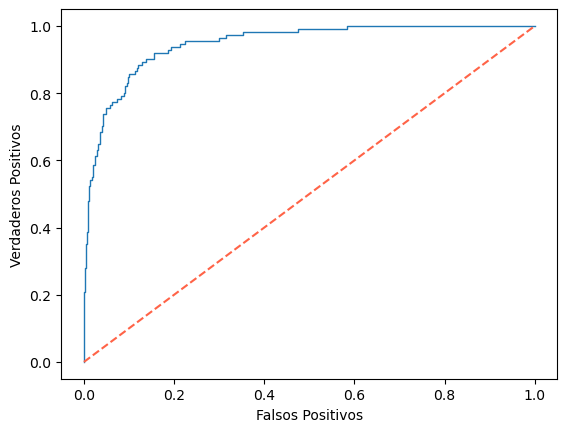

In [40]:
plt.plot(falso_positivo, verdadero_positivo, lw=1)
plt.plot([0,1], linestyle='--', color='tomato')
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')